<a href="https://colab.research.google.com/github/L-Shyamal/ear-echo/blob/main/Ear_Echo/Envelop_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#reading data from the stored CSV file
EV_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EnvData.csv')
EV_data.head(5)



,0,1,2,3,4,5,6,7,8,9,...,741,742,743,744,745,746,747,748,749,750
0,0.329481,0.329481,0.329481,0.329481,0.313967,0.313967,0.313967,0.313967,0.313967,0.246543,...,0.387374,0.387374,0.387374,0.387374,0.387374,0.387374,0.192303,0.192303,0.192303,0
1,0.165800,0.216617,0.216617,0.284702,0.284702,0.284702,0.284702,0.284702,0.284702,0.380315,...,0.166152,0.166152,0.166152,0.164068,0.164068,0.164068,0.129505,0.129505,0.129505,1
2,0.259864,0.312987,0.312987,0.312987,0.312987,0.312987,0.312987,0.312987,0.312987,0.258578,...,0.304880,0.304880,0.304880,0.304880,0.304880,0.304880,0.133416,0.115051,0.115051,2
3,0.260904,0.260904,0.260904,0.260904,0.260904,0.218554,0.207529,0.194770,0.195955,0.195955,...,0.256485,0.256485,0.256485,0.256485,0.209643,0.199635,0.150297,0.150297,0.150297,3
4,0.280764,0.280764,0.280764,0.219958,0.219958,0.219958,0.219958,0.219958,0.219958,0.219958,...,0.228190,0.281518,0.281518,0.281518,0.281518,0.281518,0.281518,0.281518,0.281518,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = EV_data.drop(columns='750',axis=1)
Y = EV_data['750']

X_check , Y_check = X[140:] ,Y[140:]
X,Y = X[:140] , Y[:140]

X_train_ev,X_test_ev,Y_train_ev,Y_test_ev = train_test_split(X,Y , test_size=0.15 ,stratify=Y, random_state=2)

X_train_ev = X_train_ev.astype('float32')
X_test_ev = X_test_ev.astype('float32')


print("# of train_eving data =",X_train_ev.shape[0])
print("# of test_evdata =",X_test_ev.shape[0])
print('# check =',X_check.shape[0])

# of train_eving data = 119
# of test_evdata = 21
# check = 8


In [ ]:
model = Sequential()
model.add(tf.keras.layers.Dense(750, activation='relu', input_shape=(750,)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(54, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.6)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_ev,Y_train_ev, epochs=500, batch_size=26)


loss, accuracy = model.evaluate(X_test_ev,Y_test_ev)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/500
5/5 [==============================] - 1s 5ms/step - loss: 17.4358 - accuracy: 0.2353
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 4.4823 - accuracy: 0.2857
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 2.3153 - accuracy: 0.2857
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 1.3782 - accuracy: 0.3697
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 1.4055 - accuracy: 0.4034
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1293 - accuracy: 0.4706
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 1.2702 - accuracy: 0.4202
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 1.0040 - accuracy: 0.5966
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9253 - accuracy: 0.5882
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8908 - accuracy: 0.6471
Epoch 11/500
5/5 [==========

In [ ]:
model.save('/content/drive/MyDrive/Ear Echo/Envelop model')

1/1 [==============================] - 0s 25ms/step - loss: 0.5521 - accuracy: 0.7826


(0.0, 1.2)

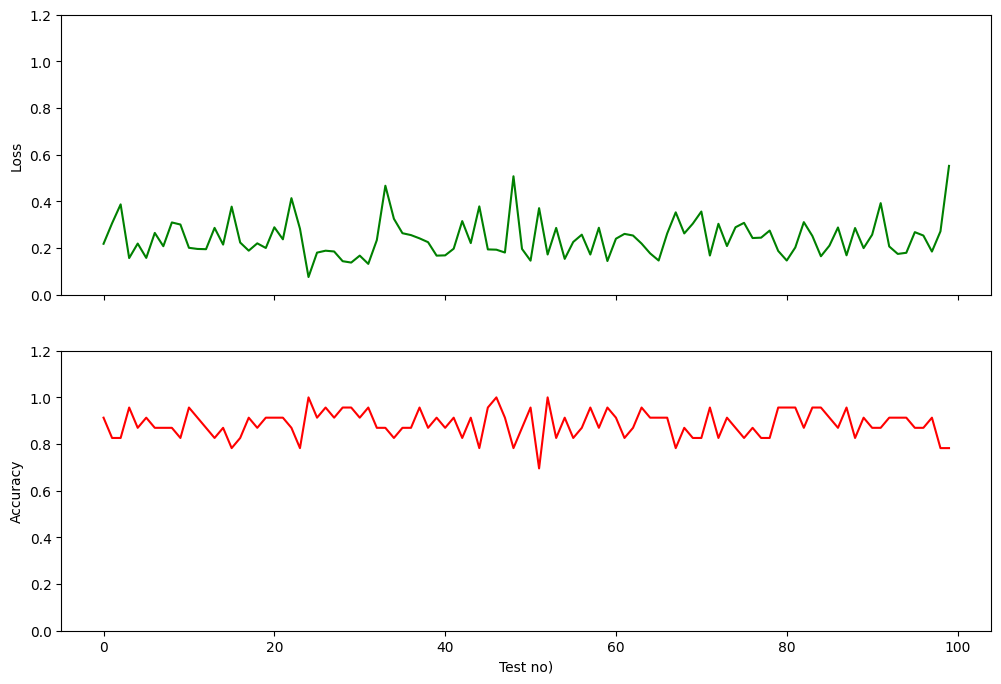

In [ ]:
TestSet = []

for lr in range(100):

    
    X_train_ev,X_test_ev,Y_train_ev,Y_test_ev = train_test_split(X,Y , test_size=0.16 ,stratify=Y, random_state=lr)

    X_train_ev = X_train_ev.astype('float32')
    X_test_ev = X_test_ev.astype('float32')

    loss, accuracy = model.evaluate(X_test_ev,Y_test_ev)
    TestSet.append([lr,loss,accuracy])

res = np.array(TestSet).T

fig, axs = plt.subplots(2, 1,figsize=(12,8), sharex=True)

axs[0].plot(res[0],res[1],color='green')
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,1.2)

axs[1].plot(res[0],res[2],color='red')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test no)")
axs[1].set_ylim(0,1.2)

In [ ]:
EV_model = tf.keras.models.load_model('/content/drive/MyDrive/Ear Echo/Envelop model')
EV_model.evaluate(X_check,Y_check)

1/1 [==============================] - 0s 136ms/step - loss: 0.0752 - accuracy: 1.0000


[0.07518628239631653, 1.0]